<h1>Content<span class="tocSkip"></span></h1>

We are working in internet shop, which is selling video games all around the world. We have data about games sales, critic and user scores, genres and platforms from open sources. We need to define success patterns for games.It can help us to bet on potentially popular product and to plan ad campaign.

## The review of the data

In [1]:
#Объявим библиотеки
import pandas as pd
games = pd.read_csv('/datasets/games.csv')
import math
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as st


In [2]:

display(games.head(10))
games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод:

В датасете games есть следующие данные:
<ul>
<li> Name — название игры</li>
<li>Platform — платформа</li>
<li>Year_of_Release — год выпуска</li>
<li>Genre — жанр игры</li>
<li>NA_sales — продажи в Северной Америке (миллионы проданных копий)</li>
<li>EU_sales — продажи в Европе (миллионы проданных копий)</li>
<li>JP_sales — продажи в Японии (миллионы проданных копий)</li>
<li>Other_sales — продажи в других странах (миллионы проданных копий)</li>
<li>Critic_Score — оценка критиков (максимум 100)</li>
<li>User_Score — оценка пользователей (максимум 10)</li>
<li>Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.</li>


В датасете 11 колонок, 16715 записей. Столбец Name имеет формат object, в нем 2 пропущенных значения. Столбец Platform имеет формат object, в нем нет пропущенных значений. Столбец Year_of_Release имеет формат float64, в нем 269 пропущенных значений. Столбец Genre имеет формат object, в нем 2 пропущенных значения. Столбец NA_sales  имеет формат float64, в нем нет пропущенных значений.Столбец EU_sales имеет формат float64, в нем нет пропущенных значений. Столбец JP_sales имеет формат float64, в нем нет пропущенных значений. Столбец Other_sales имеет формат float64, в нем нет пропущенных значений. Столбец Critic_Score имеет формат float64, в нем 8578 пропущенных значений. Столбец User_Score имеет формат object, в нем 6701 пропущенных значений. Столбец Rating  имеет формат object, в нем 6773 пропущенных значений. 
    
При изучении первоначальной информации в датасете были обнаружены следующие проблемы: Название столбцов не унифицировано и начинается с прописных букв, имеются пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Raiting. Кроме того, столбец с числовыми значениями User_Score имеет формат object. И формат столбца с годом выпуска Year_of_Release можно уменьшить с float 64 до float32, Critic_Score до float1 для уменьшения объема памяти,  занимаемой датасетом.
 
    

## Preparing to data processing


Для того, чтобы корректно обработать данные в имеющемся датасете нам необходимо:
<ul>
<li>Заменить названия столбцов (привести к нижнему регистру);</li>
<li>Преобразовать данные в нужные типы. </li>
<li>Обработать пропуски при необходимости:</li>
<li>Описать причины, которые могли привести к пропускам;</li>
<li>Разобрать аббревиатуру 'tbd' в столбцах с рейтингом;</li>
<li>Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.</li>

### Замена названия столбцов


In [3]:
games.columns = map(str.lower, games.columns)
display(games.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование типов данных

In [4]:
games['critic_score'] = pd.to_numeric(games['critic_score'], errors='coerce')

При преобразовании столбца user_score из object во float8 возникла проблема, так как столбец помимо численных значений содержит значение tbd,  которое мы подробно рассмотрим чуть дальше.
Также возникла проблема при преобразовании столбца year_of_release в int32, так как имеются незаполненные пропуски. 




### Обработка пропусков


In [5]:
display(games[games['name'].isnull()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Скорее всего, у данных игр не было официального названия, так как это 1993 год выпуска. Уберем две данные строчки из датасета, так как нет ни наименования, ни жанра, а год выпуска 1993 - эти данные не представляют для нас интереса.

In [6]:
games = games.drop(games[games['name'].isnull()].index)
games = games.reset_index(drop=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Заполним пропуски на нули и преобразуем данные в int в столбце year_of_release

In [7]:
games['year_of_release']=games['year_of_release'].fillna(0)
games.info()
display(games[games['year_of_release']==0])

#из выборки мы видим, что некоторые игры содержат год выпуска в названии. 
#Извлечем с помощью маски из 4 цифр год выпуска в отдельную колонку.

games['year'] = games.loc[(games['year_of_release']==0), 'name'].str.extract("(\d\d\d\d)", expand=True)
display(games[games['year_of_release']==0])

games['year']=games['year'].fillna(0)
games.loc[(games['year_of_release']==0), 'year_of_release'] = games['year']

games.info()
#удалим ненужный столбец
games = games.drop(columns='year')
display(games[games['year_of_release']==0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,0.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,0.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,0.0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,0.0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,0.0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,0.0,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,0.0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,0.0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,0.0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
183,Madden NFL 2004,PS2,0.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2004
377,FIFA Soccer 2004,PS2,0.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2004
456,LEGO Batman: The Videogame,Wii,0.0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,NaN
475,wwe Smackdown vs. Raw 2006,PS2,0.0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2006
609,Space Invaders,2600,0.0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,0.0,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,2008
16403,Freaky Flyers,GC,0.0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,NaN
16446,Inversion,PC,0.0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,NaN
16456,Hakuouki: Shinsengumi Kitan,PS3,0.0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null object
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
year               16713 non-null object
dtypes: float64(5), object(7)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,0,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,0,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16346,Agarest Senki: Re-appearance,PS3,0,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16403,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
games['year_of_release'] = games['year_of_release'].astype('int32')
games.info()
display(games.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int32
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [9]:
display(games[games['critic_score'].isnull()])
display(games[(games['critic_score'].isnull())&(games['year_of_release']==2016)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN
1215,Ratchet & Clank (2016),PS4,2016,Platform,0.50,0.76,0.04,0.24,NaN,NaN,NaN
1274,Doom (2016),PS4,2016,Shooter,0.54,0.69,0.02,0.24,NaN,NaN,NaN
1465,Yokai Watch 3,3DS,2016,Action,0.00,0.00,1.33,0.00,NaN,NaN,NaN
1474,The Elder Scrolls V: Skyrim,PS4,2016,Role-Playing,0.48,0.59,0.04,0.21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16697,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16701,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN


Как мы видим, в строках, которые не содержат данных по critic_score, нет данных и по user_score и raiting. Возможно, в данном датафрейме при создании не было данных о рейтингах и оценках игр, плюс 270 строк содержат игры 2016 года, то есть эти данные, возможно, не успели получить.

Необходимо решить,  как можно заполнить пропуски critic_score, user_score и raiting. Полагаем, рейтинг можно оставить как есть, а для построения графиков лучше перевести user_score из object во float. Для этого необходимо решить вопрос значения tbd.
Для этого рассмотрим уникальные значения колонок  critic_score и user_score.

In [10]:
display(games['critic_score'].unique())
display(games['user_score'].unique())

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Сокращение tbd присутствует только в столбце с user_score. Tbd означает "to be determined", то есть оценку пользователей еще не определили. То есть ее нет. Исходя из этого, мы вполне можем заменить пропуски и tbd нулями, а при построении графиков учитывать только данные больше нуля

In [11]:
games['critic_score']=games['critic_score'].fillna(0)


games.loc[(games['user_score']=='tbd'), 'user_score'] = 0

games['user_score'] = games['user_score'].astype('float64')

games['user_score'] = games['user_score'].fillna(0)
games.info()
display(games.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int32
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             9949 non-null object
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,NaN


### Подсчет суммарных продаж

In [12]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
display(games.head(20))
games['total_sales'].unique()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,NaN,28.31


array([8.254e+01, 4.024e+01, 3.552e+01, ..., 2.000e-02, 1.000e-02,
       0.000e+00])

### Вывод
Мы изучили пропуски и сделали предположения о причинах их появления в датасете. Был изменен формат данных, а также убрана пометка tbd из столбца user_score. Добавлена новая колонка total_sales с итоговой суммой. Оказалось, что весь датасет отсортирован в порядке убывания суммы общих продаж.


## Research data analysis
Посмотрим, сколько игр выпускалось в разные годы. 
Определим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и постройте распределение по годам.        
Возьмем данные за соответствующий актуальный период и определим, какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 


Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


### Анализ игр по годам выпуска

In [13]:
games_count = games[games['year_of_release']>0].pivot_table(values = ['name'], index = ['year_of_release'],\
                                                            aggfunc = 'count').reset_index()
display(games_count)


,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


### Анализ продаж игр по платформам

Определим платформы с наибольшими суммарными продажами.
Для этого сделаем сводную таблицу pivot table с платформами


In [14]:
platform_rating = games.pivot_table(values = ['total_sales'], index = ['platform'],aggfunc = 'sum')
display(platform_rating)
platform_rating = platform_rating.reset_index()\
      .sort_values(['total_sales'], ascending= 0)
display(platform_rating)

platform_rating.columns = ['platform','total_sales']



,total_sales
platform,
2600,96.98
3DO,0.10
3DS,259.00
DC,15.95
DS,806.12
GB,255.46
GBA,317.85
GC,198.93
GEN,28.35


,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


In [15]:
#Выберем список наиболее популярных платформ
top_platform = platform_rating[(platform_rating['total_sales']>250)]
display(top_platform)
names_top = top_platform['platform'].tolist()

#Выберем на основе данного списка данные из общего датасета
filtered_platform_data = games[(games['platform'].isin(names_top))]
display(filtered_platform_data.head(5))




,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,31.38


,3DS,DS,GB,GBA,NES,PC,PS,PS2,PS3,PS4,PSP,Wii,X360,XB
year_of_release,,,,,,,,,,,,,,
0,1.19,3.33,1.03,4.97,NaN,3.41,3.28,8.49,8.31,NaN,3.71,16.33,10.12,5.08
1983,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,NaN,0.02,NaN,NaN,53.44,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,1.43,NaN,45.01,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,NaN,64.97,NaN,7.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,NaN,NaN,4.89,NaN,15.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


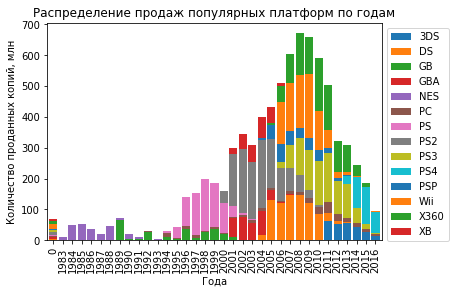

In [16]:
#Построим pivot_table с распределением популярных платформ по годам
platform_rating_top = filtered_platform_data.pivot_table(values = ['total_sales'], columns = ['platform'], index = ['year_of_release'],aggfunc = 'sum')
platform_rating_top.columns = platform_rating_top.columns.droplevel(0)
platform_rating_top = platform_rating_top.rename_axis(None, axis=1)
display(platform_rating_top)

cmap = cm.get_cmap('Spectral')

platform_rating_top.plot(kind='bar', stacked=True, width=0.85)
plt.title("Распределение продаж популярных платформ по годам")
plt.xlabel("Года")
plt.ylabel("Количество проданных копий, млн")



plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Мы выбрали самые популярные платформы и сравнили продажи по годам. Из графиков мы видим, что средний срок "жизни" платформы 8-10 лет. Из этого следует, что если мы возьмем выборку по половине срока "жизни" платформы, 5 лет, из этой выборки будет точно понятно, находится ли платформа на пике популярности, набирает или перестает быть популярной. 

Сделааем выборку по всем платформам за предыдущие 5 лет

,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.73,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Index(['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360',
       'XOne'],
      dtype='object')

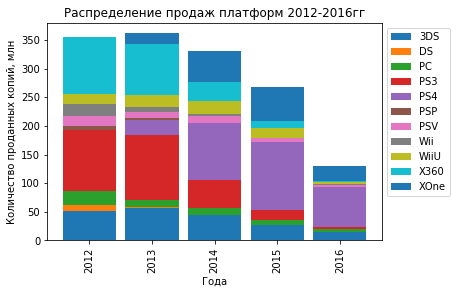

In [17]:
filtered_platform_year = games[(games['year_of_release']>2011)]
platform_actual = filtered_platform_year.pivot_table(values = ['total_sales'], columns = ['platform'], index = ['year_of_release'],aggfunc = 'sum')

platform_actual.columns = platform_actual.columns.droplevel(0)
platform_actual = platform_actual.rename_axis(None, axis=1)

display(platform_actual)
display(platform_actual.columns)
platform_actual.plot(kind='bar', stacked=True, width=0.85)
plt.title("Распределение продаж платформ 2012-2016гг")
plt.xlabel("Года")
plt.ylabel("Количество проданных копий, млн")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()



2016 год выдался довольно непростым для игровых платформ - продажи упали в целом. Судя по графику, можно выделить платформы находящиеся к 2017 году на пике - XOne и PS4. Остальные платформы из представленных уходят с рынка.

Text(0, 0.5, 'Количество проданных копий, млн')

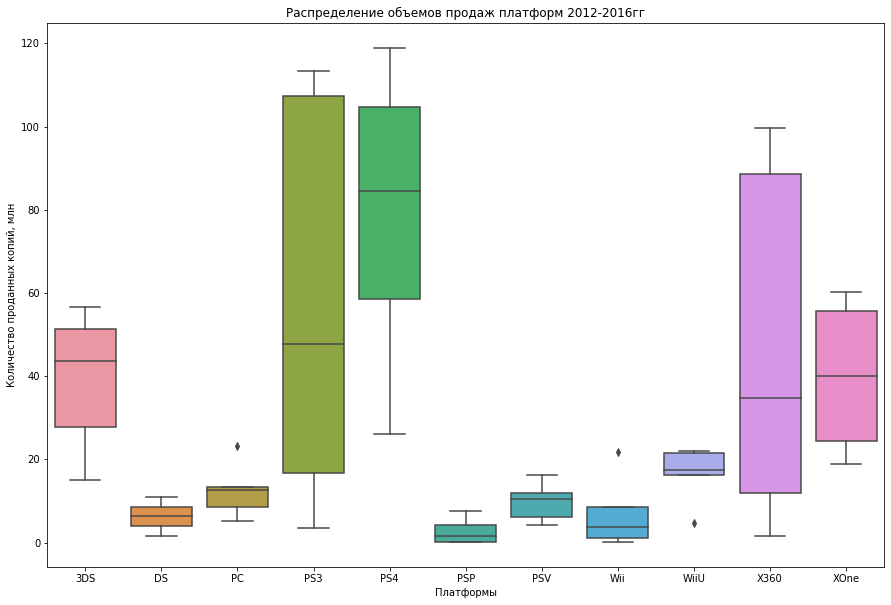

In [18]:

plt.rcParams['figure.figsize'] = (15,10)
sns.boxplot(data=platform_actual)
plt.title("Распределение объемов продаж платформ 2012-2016гг")
plt.xlabel("Платформы")
plt.ylabel("Количество проданных копий, млн")


В построенных графиках мы видим распределение данных по продажам платформ за выбранный отрезок времени. Графики очень сильно различаются, в данных графиков WiiU, PC, Wii присутствуют выбросные данные, причем у платформы WiiU минимальные, а у платформ PS и Wii максимальные. Данные Wii и WiiU находятся по разным стороным графиков.Возможно, эта неровность вызвана тем, что WiiU - это следующее поколение платформы Wii и спад популярности одной вызван ростом популярности другой платформы. Платформы на пике популярности PS4 и XOne не имеют выбросных данных, 1 и 3 квартили примерно симметричны.

### Оценка зависимости продаж от отзывов 
Изучим влияние критиков на продажи внутри популярной платформы PS4. Построим диаграмму рассеяния и изучим корелляцию

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


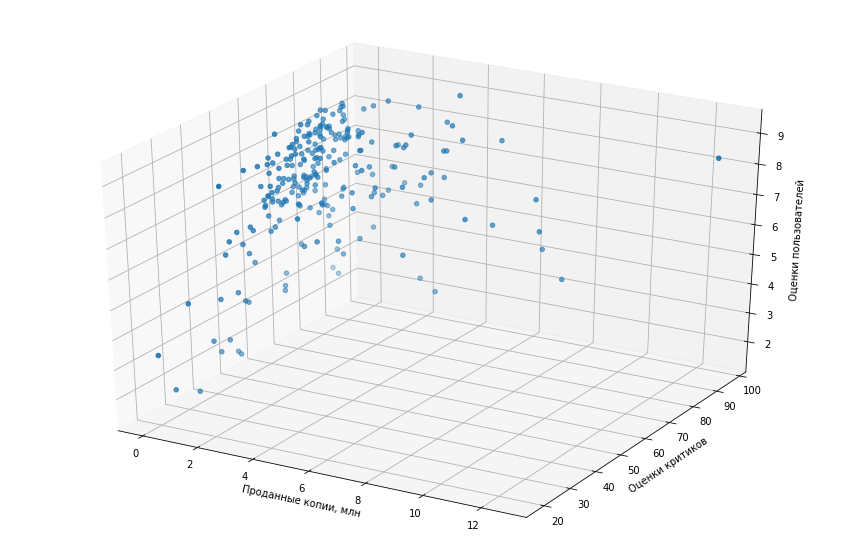

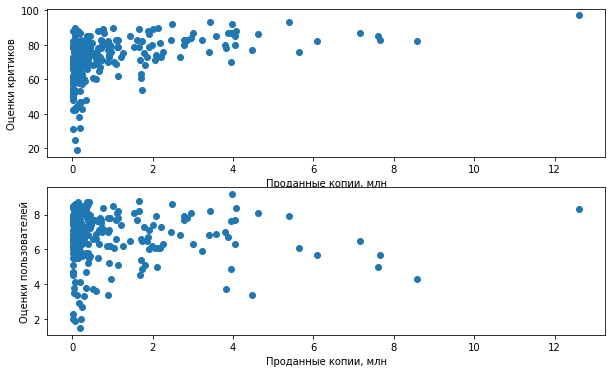

Коэффициент корелляции между продажами игр на платформе PS4 и оценками критиков и пользователей:


,total_sales,critic_score,user_score
total_sales,1.000000,0.405895,-0.033625
critic_score,0.405895,1.000000,0.557654
user_score,-0.033625,0.557654,1.000000


In [19]:
data_ps4 = games[(games['platform'] =='PS4')&(games['year_of_release'] > 2011)&(games['critic_score']>0)&(games['user_score']>0)]
display(data_ps4.head(5))

#scatterplot = sns.scatterplot(data=data_ps4, x='total_sales', y=['critic_score', 'user_score'])
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = data_ps4['total_sales']
y = data_ps4['critic_score']
z = data_ps4['user_score']

ax.scatter(x, y, z)
ax.set_xlabel("Проданные копии, млн")
ax.set_ylabel("Оценки критиков")
ax.set_zlabel("Оценки пользователей")

plt.show()

fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].scatter(x = data_ps4['total_sales'], y = data_ps4['critic_score'])
ax[0].set_xlabel("Проданные копии, млн")

ax[0].set_ylabel("Оценки критиков")

ax[1].scatter(x = data_ps4['total_sales'], y = data_ps4['user_score'])
ax[1].set_xlabel("Проданные копии, млн")
ax[1].set_ylabel("Оценки пользователей")

plt.show()


corr = data_ps4[['total_sales', 'critic_score', 'user_score']].corr()
print('Коэффициент корелляции между продажами игр на платформе PS4 и оценками критиков и пользователей:' )
display(corr)

Мы видим примерно одинаковую картину зависимости продаж от оценок критиков и пользователей. В диаграмме рассеяния мы наблюдаем прямую корреляцию продажами между оценками критиков и незначительную обратную между оценками пользователей и продажами. Полагаем, в остальных платформах имеется та же картина - их продажи не зависят от оценок пользователей, но немного зависят от оценок критиков

Text(0, 0.5, 'Оценки пользователей')

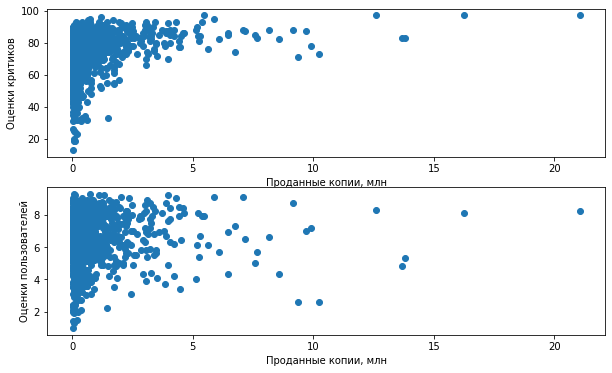

In [20]:
#проверим эту закономерность на всех платформах
common_data = games[(games['year_of_release'] > 2011)&(games['critic_score']>0)&(games['user_score']>0)]
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].scatter(x = common_data['total_sales'], y = common_data['critic_score'])
ax[0].set_xlabel("Проданные копии, млн")

ax[0].set_ylabel("Оценки критиков")

ax[1].scatter(x = common_data['total_sales'], y = common_data['user_score'])
ax[1].set_xlabel("Проданные копии, млн")
ax[1].set_ylabel("Оценки пользователей")

In [21]:
corr = common_data[['total_sales', 'critic_score', 'user_score']].corr()
print('Коэффициент корелляции между продажами всех игр и оценками критиков и пользователей:' )
display(corr)

Коэффициент корелляции между продажами всех игр и оценками критиков и пользователей:


,total_sales,critic_score,user_score
total_sales,1.000000,0.306138,0.000341
critic_score,0.306138,1.000000,0.518199
user_score,0.000341,0.518199,1.000000


Наши предположения верны. Графики рассеяния PS4  и всех игр схожи. Корелляция всех игр с оценками критиков даже еще меньше - 30%

### Анализ игр по жанрам

,genre,count,sum
0,Action,1032,441.47
1,Adventure,302,29.43
2,Fighting,109,44.49
3,Misc,192,85.04
4,Platform,85,61.00
5,Puzzle,28,4.89
6,Racing,115,53.50
7,Role-Playing,370,192.80
8,Shooter,235,304.73
9,Simulation,80,35.12


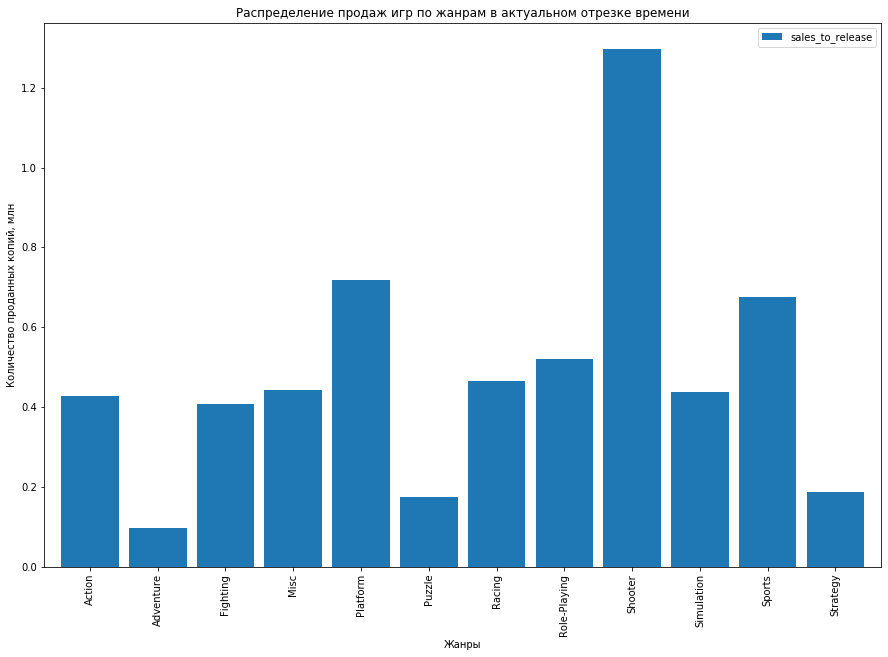

In [22]:
actual_genres = filtered_platform_year.pivot_table(values = ['total_sales'], index = ['genre'],aggfunc = ['count', 'sum']).reset_index()
actual_genres.columns = actual_genres.columns.droplevel(1)
actual_genres = actual_genres.rename_axis(None, axis=1)
display(actual_genres)
actual_genres['sales_to_release'] = actual_genres['sum']/actual_genres['count']
actual_genres.plot(x = 'genre', y = 'sales_to_release', kind='bar', width=0.85)
plt.title("Распределение продаж игр по жанрам в актуальном отрезке времени")
plt.xlabel("Жанры")
plt.ylabel("Количество проданных копий, млн")
plt.legend(bbox_to_anchor=(1, 1)) 
plt.show()


Наиболее популярный жанр - Shooter, за ним Platform и Sports. Самые непопулярные - Puzzle и Adventure

## Составим портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

,eu_sales,jp_sales,na_sales
platform,,,
3DS,42.64,87.79,55.31
DS,3.53,3.72,4.59
PC,38.01,0.00,19.18
PS3,106.86,35.29,103.38
PS4,141.09,15.96,108.74
PSP,0.42,10.47,0.13
PSV,11.36,21.04,10.98
Wii,11.92,3.39,17.45
WiiU,25.13,13.01,38.10


Text(0, 0.5, 'Количество проданных копий, млн')

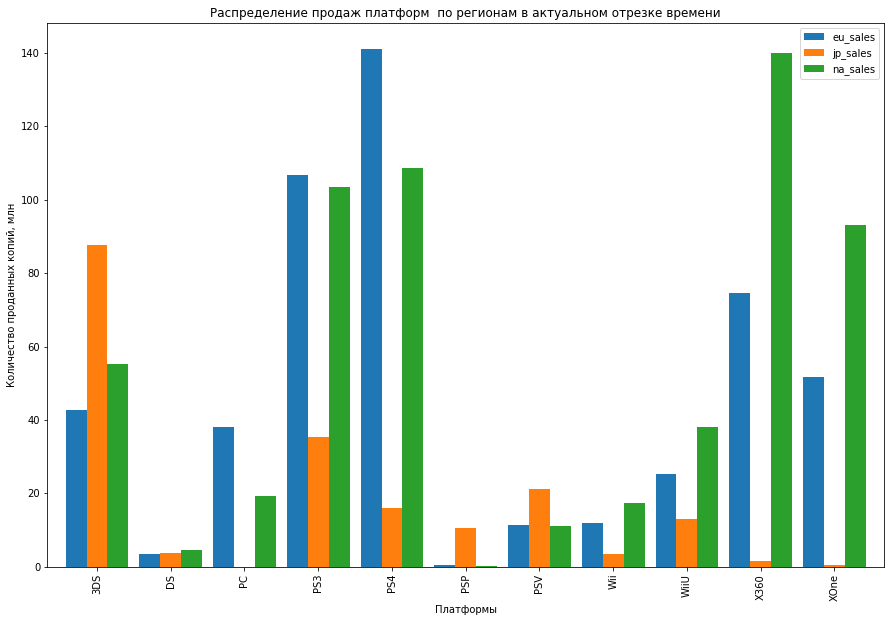

In [23]:
actual_platforms_region = filtered_platform_year.pivot_table(values = ['na_sales', 'eu_sales', 'jp_sales'], index = ['platform'],aggfunc = 'sum')
display(actual_platforms_region)
actual_platforms_region.plot(kind='bar', width=0.85)
plt.title("Распределение продаж платформ  по регионам в актуальном отрезке времени")
plt.xlabel("Платформы")
plt.ylabel("Количество проданных копий, млн")


В целом, популярные платформы в Европе и Северной Америке не отличаются друг от друга. Разница только в объемах продаж. Самые высокие продажи в Северной Америке и Европе. Самые низкие объемы продаж различных платформ у Японии. И здесь главное отличие в популярных платформах, так азиатский рынок довольно своеобразен и на него не действуют законы продаж, принятые на Западе. Полагаем, это также будет видно по популярным жанрам игр.

Топ-5 платформ в Северной Америке:
<ol>
<li> X360</li>
<li> PS4</li>    
<li> PS3</li>    
<li> XOne</li> 
<li> 3DS</li> </ol>   

Топ-5 платформ в Европе:
<ol>
<li> X360</li>
<li> PS4</li>    
<li> PS3</li>    
<li> 3DS</li> 
<li> XOne</li> </ol>  

Топ-5 платформ в Японии:
<ol>
<li> 3DS</li>
<li> PS3</li>    
<li> PSV</li>    
<li> PS4</li> 
<li> WiiU</li> </ol>  

,eu_sales,jp_sales,na_sales
genre,,,
Action,159.59,52.80,177.90
Adventure,9.46,8.24,8.92
Fighting,10.79,9.44,19.79
Misc,26.32,12.86,38.19
Platform,21.41,8.63,25.38
Puzzle,1.40,2.14,1.13
Racing,27.29,2.50,17.22
Role-Playing,48.53,65.44,64.00
Shooter,113.47,9.23,144.77


Text(0, 0.5, 'Количество проданных копий, млн')

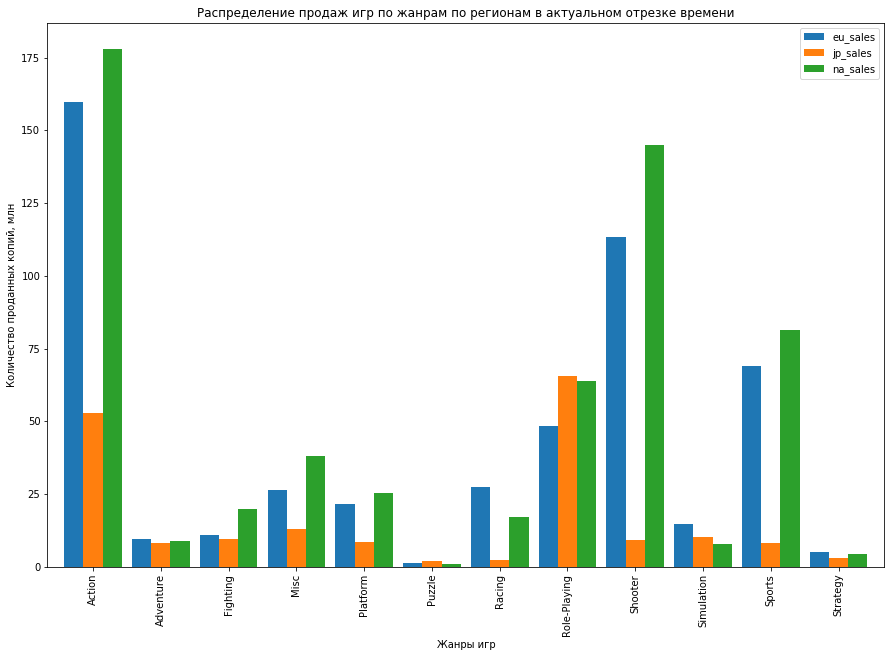

In [24]:
actual_genres_region = filtered_platform_year.pivot_table(values = ['na_sales', 'eu_sales', 'jp_sales'], index = ['genre'],aggfunc = 'sum')
display(actual_genres_region)
actual_genres_region.plot(kind='bar', width=0.85)
plt.title("Распределение продаж игр по жанрам по регионам в актуальном отрезке времени")
plt.xlabel("Жанры игр")
plt.ylabel("Количество проданных копий, млн")

В этом графике мы видим подтверждение, что японский рынок игр отличается от западного. В части некоторых жанров регионы схожи, но есть и глобальные отличия.
Топ-5 игровых жанров в Северной Америке:
<ol>
<li> Action	</li>
<li> Shooter</li>    
<li> Sports</li>    
<li> Role-playing</li> 
<li> Misc</li> </ol>   

Топ-5 игровых жанров в Европе:
<ol>
<li> Action	</li>
<li> Shooter</li>    
<li> Sports</li>    
<li> Role-playing</li> 
<li> Racing</li> </ol>    

Топ-5 платформ в Японии:
<ol>
<li> Role-playing</li>
<li> Action	</li>
<li> Misc</li>    
<li> Simulation</li>    
<li> Fighting</li> </ol>  


Соберем сводную таблицу по количеству продаж игр по рейтингам

In [25]:


games_rating = filtered_platform_year[~filtered_platform_year['rating'].isnull()]
games_not_rated = filtered_platform_year[filtered_platform_year['rating'].isnull()]
actual_rating_region = games_rating.pivot_table(values = ['na_sales', 'eu_sales', 'jp_sales'],\
                                                          index = ['rating'],aggfunc = 'sum')

actual_rating_region.columns = ['sum_na', 'sum_eu', 'sum_jp']

display(actual_rating_region)

,sum_na,sum_eu,sum_jp
rating,,,
E,113.03,28.33,114.37
E10+,55.37,8.19,75.70
M,194.21,21.20,231.63
T,52.96,26.02,66.02


Так как игры в каких-то регионах не продавались, количество их релизов было разным. Почитаем количество их релизов по каждому региону и смержим в общую таблицу.

In [26]:

na_rating = games_rating[games_rating['na_sales']!=0]
na_rating_count = na_rating.pivot_table(values = 'na_sales',\
                                                          index = ['rating'],aggfunc = 'count')
na_rating_count.columns = ['na_count']
actual_rating_region = actual_rating_region.merge(na_rating_count, on=['rating'],how='outer')

eu_rating = games_rating[games_rating['eu_sales']!=0]
eu_rating_count = eu_rating.pivot_table(values = 'eu_sales',\
                                                          index = ['rating'],aggfunc = 'count')
eu_rating_count.columns = ['eu_count']
actual_rating_region = actual_rating_region.merge(eu_rating_count, on=['rating'],how='left')

jp_rating = games_rating[games_rating['jp_sales']!=0]
jp_rating_count = jp_rating.pivot_table(values = 'jp_sales',\
                                                          index = ['rating'],aggfunc = 'count')
jp_rating_count.columns = ['jp_count']
actual_rating_region = actual_rating_region.merge(jp_rating_count, on=['rating'],how='outer')



Теперь посчитаем количество продаж на каждый релиз по регионам и построим график

,sum_na,sum_eu,sum_jp,na_count,eu_count,jp_count,sales_per_release_na,sales_per_release_eu,sales_per_release_jp
rating,,,,,,,,,
E,113.03,28.33,114.37,297,336,105,0.380572,0.084315,1.089238
E10+,55.37,8.19,75.70,266,281,67,0.208158,0.029146,1.129851
M,194.21,21.20,231.63,455,460,227,0.426835,0.046087,1.020396
T,52.96,26.02,66.02,306,318,228,0.173072,0.081824,0.289561


Text(0, 0.5, 'Количество проданных копий на один релиз, млн')

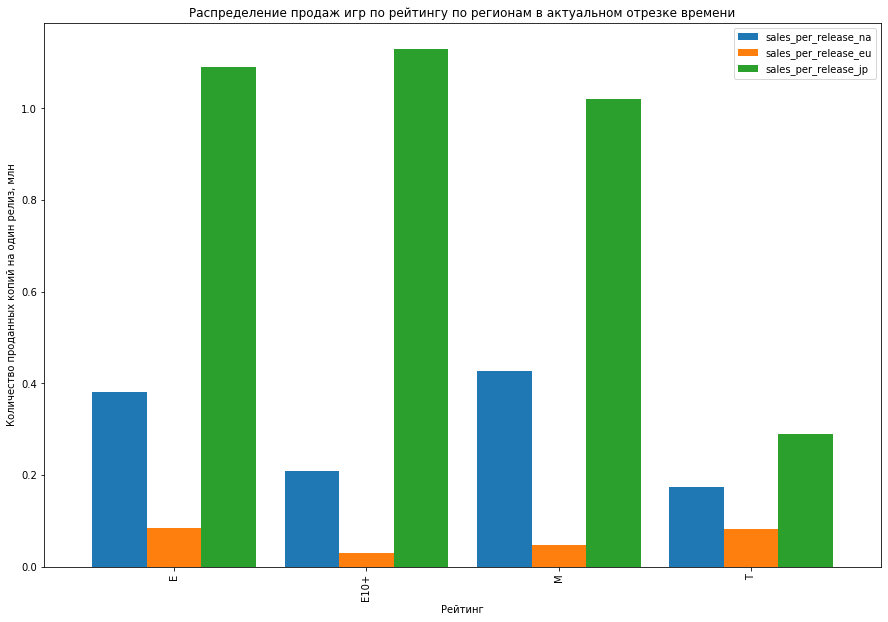

In [27]:
#посчитаем сумму продаж на каждый релиз по регионам
actual_rating_region['sales_per_release_na'] = actual_rating_region['sum_na']/actual_rating_region['na_count']
actual_rating_region['sales_per_release_eu'] = actual_rating_region['sum_eu']/actual_rating_region['eu_count']
actual_rating_region['sales_per_release_jp'] = actual_rating_region['sum_jp']/actual_rating_region['jp_count']
display(actual_rating_region)

actual_rating_region = actual_rating_region.drop(columns=['sum_na', 'sum_eu', 'sum_jp', 'na_count', 'eu_count', 'jp_count'])

actual_rating_region.plot(kind='bar', width=0.85)
plt.title("Распределение продаж игр по рейтингу по регионам в актуальном отрезке времени")
plt.xlabel("Рейтинг")
plt.ylabel("Количество проданных копий на один релиз, млн")

Для начала разберёмся, что означают рейтинги ESRB:

<ul><li>E - everyone</li>
<li>E10+ - everyone 10+</li>
<li>T - teen (13+)</li>
<li>M - mature (17+)</li>
<li>A - adults (18+)</li>
<li>RP - rating pending (рейтинг пока не присвоен)</li></ul>

Согласно нашему исследованию, Япония бьет рекорды по количеству проданных копий любого рейтинга. E, E10+, M наиболее популярны. А игры для подростков (T)продаются хуже. 
В Европе игры для всех и игры для подростков (T) продаются чуть лучше, чем  с возрастным цензом 17 и 10 лет (M и E10+).
В Северной Америке игры для всех (E) и игры c возрастным цензом (M) продаются лучше остальных.

Теперь проведем исследование для игр без рейтинга

103.31
354
91.5
417
108.84
942


,sales_per_release_na,sales_per_release_eu,sales_per_release_jp
0,0.291836,0.219424,0.115541


Text(0, 0.5, 'Количество проданных копий на один релиз, млн')

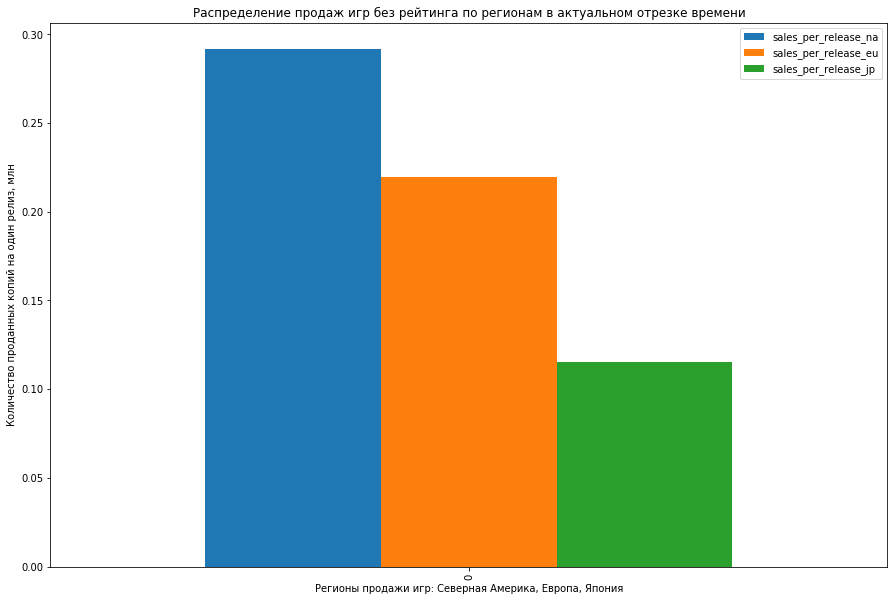

In [28]:
#создадим пустой датафрейм и дадим названия столбцов
games_not_rated_region = pd.DataFrame(columns=['sales_per_release_na',\
                                               'sales_per_release_eu', 'sales_per_release_jp'])

#посчитаем сумму продаж и количество релизов для каждого региона
not_rated_na_sum = games_not_rated.loc[(games_not_rated['na_sales']!=0), 'na_sales'].sum()
not_rated_na_count = games_not_rated.loc[(games_not_rated['na_sales']!=0), 'na_sales'].count()
games_not_rated_na = not_rated_na_sum/not_rated_na_count
print(not_rated_na_sum)
print(not_rated_na_count)

not_rated_eu_sum = games_not_rated.loc[(games_not_rated['eu_sales']!=0), 'eu_sales'].sum()
not_rated_eu_count = games_not_rated.loc[(games_not_rated['eu_sales']!=0), 'eu_sales'].count()
print(not_rated_eu_sum)
print(not_rated_eu_count)

games_not_rated_eu = not_rated_eu_sum/not_rated_eu_count

not_rated_jp_sum = games_not_rated.loc[(games_not_rated['jp_sales']!=0), 'jp_sales'].sum()
not_rated_jp_count = games_not_rated.loc[(games_not_rated['jp_sales']!=0), 'jp_sales'].count()
print(not_rated_jp_sum)
print(not_rated_jp_count)

games_not_rated_jp = not_rated_jp_sum/not_rated_jp_count


#заполним датасет
games_not_rated_region = games_not_rated_region.append({'sales_per_release_na': \
                                                        games_not_rated_na, 'sales_per_release_eu':\
                                                        games_not_rated_eu, 'sales_per_release_jp':\
                                                        games_not_rated_jp}, ignore_index=True)


display(games_not_rated_region)
games_not_rated_region.plot(kind='bar', width=0.85)
plt.title("Распределение продаж игр без рейтинга по регионам в актуальном отрезке времени")
plt.xlabel("Регионы продажи игр: Северная Америка, Европа, Япония")
plt.ylabel("Количество проданных копий на один релиз, млн")

Сравнив графики, мы видим, что во всех странах игры без рейтинга обладают такой же популярностью, как и игры с рейтингом, во всех регионах, кроме Японии.

## Hypothesis checking
<b>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.</b>

Сформулируем нулевую гипотезу:Средние пользовательские рейтинги платформ Xbox One и PC в представленной выборке одинаковые.

Сформулируем альтернативную гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC в представленной выборке различаются.

In [29]:
data_actual_xone = filtered_platform_year[(filtered_platform_year['platform'] == 'XOne')&(~filtered_platform_year['user_score'].isnull())]
data_actual_pc = filtered_platform_year[(filtered_platform_year['platform'] == 'PC')&(~filtered_platform_year['user_score'].isnull())]
print('cреднее XOne: ', data_actual_xone['user_score'].mean())
print('cреднее PC: ', data_actual_pc['user_score'].mean())

alpha = 0.05

results = st.ttest_ind(data_actual_xone['user_score'],data_actual_pc['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cреднее XOne:  4.805263157894737
cреднее PC:  5.30996015936255
p-значение: 0.06093976453551038
Не получилось отвергнуть нулевую гипотезу


<b>Средние пользовательские рейтинги жанров Action и Sports разные.</b>

Сформулируем нулевую гипотезу:Средние пользовательские рейтинги жанров Action и Sports  в представленной выборке одинаковые.

Сформулируем альтернативную гипотезу: Средние пользовательские рейтинги жанров Action и Sports  в представленной выборке различаются.


In [30]:
data_actual_action = filtered_platform_year[(filtered_platform_year['genre'] == 'Action')&(~filtered_platform_year['user_score'].isnull())]
data_actual_sports = filtered_platform_year[(filtered_platform_year['genre'] == 'Sports')&(~filtered_platform_year['user_score'].isnull())]
print('cреднее Action: ', data_actual_action['user_score'].mean())
print('cреднее Sports: ', data_actual_sports['user_score'].mean())

alpha = 0.05

results = st.ttest_ind(data_actual_action['user_score'],data_actual_sports['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cреднее Action:  3.467054263565892
cреднее Sports:  3.9697761194029852
p-значение: 0.032218007641900616
Отвергаем нулевую гипотезу


### Вывод
При проверке гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, для сравнения была выбрана гипотеза о равенстве средних двух генеральных совокупностей, потому что для исследования берутся две неравные группы с пользовательскими оценками игр разных платформ, обладающих разными признаками.

Исследование показало, что с вероятностью 95% средние пользовательские рейтинги платформ Xbox One и PC одинаковые (у нас не получилось отвергнуть нулевую гипотезу)

При проверке гипотезы о том, что средние пользовательские рейтинги жанров Action и Sports разные, была выбрана гипотеза о равенстве средних двух генеральных совокупностей. 

Исследование показало, что средние пользовательские рейтинги жанров Action и Sports разные (мы отвергли нулевую гипотезу)

## Общий вывод

В результате нашего исследования мы выявили определяющие успешность игры закономерности:
<ol>
    <li>Платформа игры. 
    На конец 2016 года набирают популярность платформы PS4 и XBox One. Это утверждение имеет значение для общего рынка игр и Северной Америки и Европы в частности. В Японии не все так однозначно и большинство предпочитает другие, не представленные в выборке платформы </li>
    <li>Жанр игры.
    Наиболее популярный жанр - Simulation, за ним Platform и Sports. Самые непопулярные - Puzzle и Adventure</li>
    <li>Регион продажи игры.
    Исследование показало, что рынки игр Северной Америки и Европы мало отличаются, а в Японии рынок игр, хоть и имеет какие-то общие закономерности, в целом отличается от западных</li>
    <li>Рейтинг
    Мы выяснили, что в Японии игры с рейтингом продаются лучше, чем игры без рейтинга, в остальных же регионах рейтинг не влияет на успешность.</li>
</ol>